In [33]:
import pandas as pd
import numpy as np
#plotting
%matplotlib inline
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots
#plotly.offline.init_notebook_mode(connected=True)

import yfinance as yf

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#notebook formatting
from IPython.core.display import display, HTML
from IPython.display import IFrame

import warnings
warnings.filterwarnings('ignore')

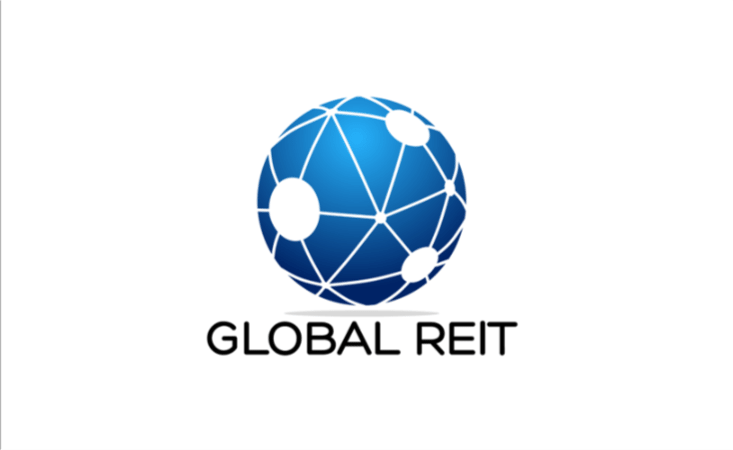

<a id ="content"></a>
## TABLE OF CONTENTS:

[GICS REIT Classification](#class)

1. [**Global Sector-Wise REIT Returns Box Plot - Interactive**](#1)


2. [**Global Country-Wise REIT Returns Box Plot - Interactive**](#2)


3. [**Global REIT Data Filter Table**](#table)


4. [**High Yielding & High Momentum Industrial REITs**](#industrial)


5. [**High Yielding & High Momentum Specialized REITs**](#specialty)


6. [**High Yielding & High Momentum Diversified Global REITs**](#diverse)


7. [**Saudi Arabian Diversified REITs**](#sar)


8. [**High Yielding & High Momentum Global Healthcare REITs**](#health)


9. [**Turkish Retail, Diversified & Resident REITs**](#tur)


10. [**Japanese Hotel & Resort REITs**](#jp-hotel)  

In [2]:
data = pd.read_excel('REIT Screen.xlsx', sheet_name='Sheet4', header=0)
data["Dividend Yield"] = pd.to_numeric(data["Dividend Yield"]).round(4)*100
data.iloc[:, 7:12] = (data.iloc[:, 7:12]*100).round(2)
#data.head(3)

In [3]:
data['Dividend Yield'] = data['Dividend Yield'].replace("NA", None)

In [4]:
a = list(data["Country"].unique()) + ["All"]
#a.append(list(data["Country"]))

<a id ="class"></a>

## GICS REIT Classification Definitions

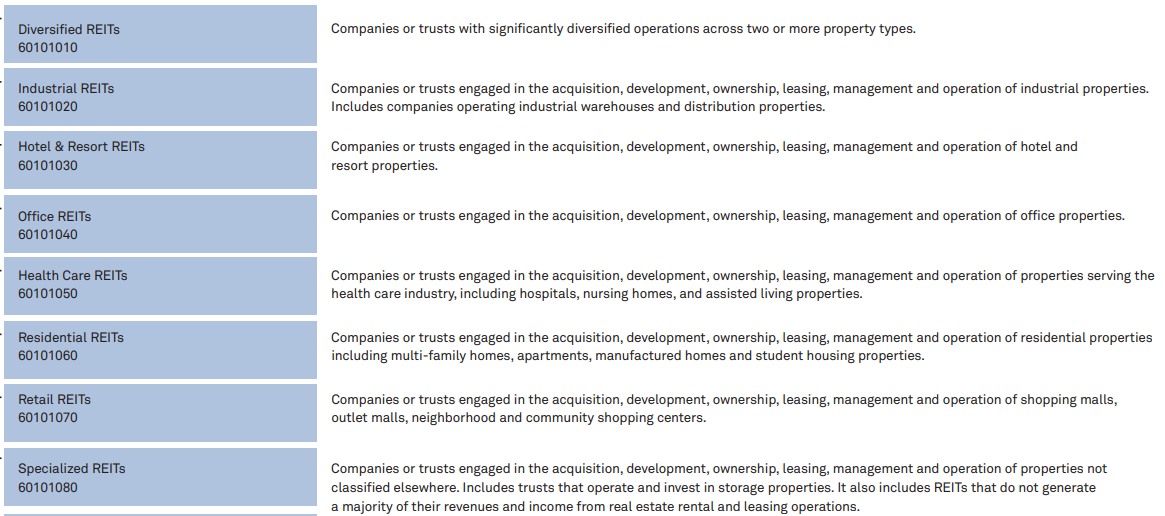

<a id ="1"></a>

[Return to Table of Contents](#content)

## Global Sector-Wise REIT Returns Box Plot

> 1. Select Country or Global

> 2. Select USD Total Return Period from 1M, 3M, 6M, YTD and 1Y or the Dividend Yield (%)

In [23]:
def reit_returns(period, country):
    if country == "All":
        fig = px.box(data, x="Industry", y=period, color="Industry", 
                     hover_data=["Country", "BBG Ticker", "Name","Market Cap (USD)",
                                "Dividend Yield", "Dividend Type", "Dividend Currency", "Price/NAV",
                                "Price/FFO", "Net Debt/EBITDA",'1 Month (%)', '3 Month (%)', 
                                 '6 Month (%)', 'YTD (%)', '1Y (%)'], points="all")        
    else:
        fig = px.box(data[data["Country"] == country], x="Industry", y=period, color="Industry", 
                     hover_data=["Country", "BBG Ticker", "Name","Market Cap (USD)",
                                "Dividend Yield", "Dividend Type", "Dividend Currency", "Price/NAV",
                                "Price/FFO", "Net Debt/EBITDA",'1 Month (%)', '3 Month (%)', 
                                 '6 Month (%)', 'YTD (%)', '1Y (%)'], points="all")

    fig.update_layout(title = 'Global REITs Sector Wise USD Returns - '+str(period), 
                      font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                      legend_title_text='Industries', plot_bgcolor = 'White')
    fig.update_yaxes(ticksuffix="%")
    #fig.update_traces(hovertemplate='Date: %{x} <br>Return: %{y:.2%}') 
    return fig.show()
    
style = {'description_width': 'initial'}  
interact(reit_returns, period=widgets.Dropdown(options=['1 Month (%)', '3 Month (%)', 
                             '6 Month (%)', 'YTD (%)', '1Y (%)', 'Dividend Yield'], value='1 Month (%)', 
                                               description = 'Period: ', style=style),
                        country = widgets.Dropdown(options=a, value="All", 
                                               description = 'Country: ', style=style));

interactive(children=(Dropdown(description='Period: ', options=('1 Month (%)', '3 Month (%)', '6 Month (%)', '…

In [6]:
format_dict = {'1 Month (%)': '{:.2f}%', '3 Month (%)': '{:.2f}%', '6 Month (%)': '{:.2f}%', 'YTD (%)': '{:.2f}%', '1Y (%)': '{:.2f}%', 'Dividend Yield': '{:.2f}%', 'Price/NAV': '{:}', 'Price/FFO': '{:}', 'Net Debt/EBITDA': '{:}'}
def ind_table(country, sortby):
    if country=="All":
        return data.groupby(by="Industry").mean().sort_values(by=sortby, ascending=False).style.format(format_dict).background_gradient(cmap="RdYlGn")
    else:
        return data[data["Country"]==country].groupby(by="Industry").mean().sort_values(by=sortby, ascending=False).style.format(format_dict).background_gradient(cmap="RdYlGn")
    
interact(ind_table, sortby=widgets.Dropdown(options=['1 Month (%)', '3 Month (%)', 
                             '6 Month (%)', 'YTD (%)', '1Y (%)', 'Dividend Yield'], value='1 Month (%)', 
                                               description = 'Period: ', style=style),
                        country = widgets.Dropdown(options=a, value="All", 
                                               description = 'Country: ', style=style));

interactive(children=(Dropdown(description='Country: ', index=27, options=('Turkey', 'Australia', 'South Korea…

[Return to Table of Contents](#content)

<a id ="2"></a>

## Global Country-Wise REIT Returns Box Plot

> Select USD Total Return Period from 1M, 3M, 6M, YTD and 1Y or the Dividend Yield (%)

In [30]:
def reit_cntry(industry, period):
    if industry=="All":
        fig = px.box(data, x="Country", y=period, color="Country", 
                     hover_data=["Industry", "BBG Ticker", "Name","Market Cap (USD)",
                                "Dividend Yield", "Dividend Type", "Dividend Currency", "Price/NAV",
                                "Price/FFO", "Net Debt/EBITDA", '1 Month (%)', '3 Month (%)', 
                                 '6 Month (%)', 'YTD (%)', '1Y (%)'], points="all")
    else:
        fig = px.box(data[data["Industry"]==industry], x="Country", y=period, color="Country", 
                     hover_data=["Country", "BBG Ticker", "Name","Market Cap (USD)",
                                "Dividend Yield", "Dividend Type", "Dividend Currency", "Price/NAV",
                                "Price/FFO", "Net Debt/EBITDA", '1 Month (%)', '3 Month (%)', 
                                 '6 Month (%)', 'YTD (%)', '1Y (%)'], points="all")        

    fig.update_layout(title = 'Global REITs Country Wise USD Returns - '+str(period), 
                      font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                      legend_title_text='Countries', plot_bgcolor = 'White')
    fig.update_yaxes(ticksuffix="%")
    #fig.update_traces(hovertemplate='Date: %{x} <br>Return: %{y:.2%}') 
    return fig
    
style = {'description_width': 'initial'}  
interact(reit_cntry, period=widgets.Dropdown(options=data.columns[7:12], value='1 Month (%)', 
                                               description = 'Period: ', style=style),
                     industry=widgets.Dropdown(options=["All"] + list(data["Industry"].unique()) , value='All', 
                                               description = 'Industry: ', style=style));

interactive(children=(Dropdown(description='Industry: ', options=('All', 'Diversified REITs', 'Health Care REI…

<a id ="table"></a>
## Global REIT Data Filter Table

[Return to Table of Contents](#content)

In [8]:
for i in data.iloc[:,7:12].columns:
    data[i] = pd.to_numeric(data[i])

In [9]:
pd.set_option("display.max_rows", 5000)
def reit_table(country, industry, sortby):
    if country == 'Global':
        if industry == "All":
            return data.set_index("BBG Ticker").sort_values(by=sortby, ascending=False).style.format(format_dict).background_gradient(cmap="RdYlGn")
        else:
            return data[data["Industry"]==industry] .set_index("BBG Ticker").sort_values(by=sortby, ascending=False).style.format(format_dict).background_gradient(cmap="RdYlGn")
    else:
        if industry == "All":
            return data[data["Country"]==country].set_index("BBG Ticker").sort_values(by=sortby, ascending=False).style.format(format_dict).background_gradient(cmap="RdYlGn")
        else:
            return data[data["Country"]==country][data["Industry"]==industry].set_index("BBG Ticker").sort_values(by=sortby, ascending=False).style.format(format_dict).background_gradient(cmap="RdYlGn")
        
interact(reit_table, sortby=widgets.Dropdown(options=['1 Month (%)', '3 Month (%)', 
                             '6 Month (%)', 'YTD (%)', '1Y (%)', 'Dividend Yield'], value='1 Month (%)', 
                                               description = 'Sort By: ', style=style),
                        country = widgets.Dropdown(options= a[:-1] + ["Global"], value="Global", 
                                               description = 'Country: ', style=style),
                        industry = widgets.Dropdown(options= list(data['Industry'].unique()) + ["All"], value="All", 
                                               description = 'Industry: ', style=style));

interactive(children=(Dropdown(description='Country: ', index=27, options=('Turkey', 'Australia', 'South Korea…

In [10]:
#IFrame("https://www.reuters.com/companies/3478.T", width=1000, height=600)

<a id ="jp-hotel"></a>

[Return to Table of Contents](#content)

### Japanese Hotel & Resort REITs

> On a Global basis, **Hotel & Resort REITs** have had the **Highest Median Returns (USD)**

> **Japanese Hotel and Resort REITs** have **surged** with **returns ranging from 10-21%**, with the Median being 15% in the past month alone

In [13]:
jp = data[data["Country"]=="Japan"][data["Industry"]=="Hotel & Resort REITs"].set_index("BBG Ticker").sort_values(by="1 Month (%)", ascending=False)
jp.style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Japanese Hotel & Resort REITs')

,Name,Industry,Country,Market Cap (USD),Dividend Yield,Dividend Currency,1 Month (%),3 Month (%),6 Month (%),YTD (%),1Y (%),Dividend Type,Price/NAV,Price/FFO,Net Debt/EBITDA
BBG Ticker,,,,,,,,,,,,,,,
3478 JP Equity,MORI TRUST HOTEL REIT INC,Hotel & Resort REITs,Japan,537.06M,3.08%,JPY,20.96%,14.10%,59.49%,-19.21%,-12.48%,Regular Cash,,,12.12
8963 JP Equity,INVINCIBLE INVESTMENT CORP,Hotel & Resort REITs,Japan,1.80B,0.45%,JPY,20.16%,1.81%,32.48%,-48.12%,-47.71%,Regular Cash,,10.72,14
8985 JP Equity,JAPAN HOTEL REIT INVESTMENT,Hotel & Resort REITs,Japan,2.12B,0.25%,JPY,15.19%,7.03%,65.59%,-36.50%,-34.34%,Regular Cash,,,10.37
3287 JP Equity,HOSHINO RESORTS REIT INC,Hotel & Resort REITs,Japan,1.09B,1.99%,JPY,15.02%,10.57%,84.50%,-1.37%,-1.30%,Regular Cash,,9.71,6.13
3463 JP Equity,ICHIGO HOTEL REIT INVESTMENT,Hotel & Resort REITs,Japan,169.74M,2.53%,JPY,14.21%,-0.87%,46.23%,-43.49%,-37.25%,Regular Cash,,18.25,15.15
3472 JP Equity,OOEDO ONSEN REIT INVESTMENT,Hotel & Resort REITs,Japan,147.67M,5.91%,JPY,10.71%,-3.07%,35.77%,-24.48%,-18.98%,Regular Cash,,8.53,5.83


In [11]:
jp_hotel = yf.download('3478.T 8963.T 8985.T 3287.T 3463.T 3472.T JPYUSD=X', progress=False)['Adj Close']
jp_hotel = jp_hotel.multiply(jp_hotel["JPYUSD=X"], axis=0).drop(["JPYUSD=X"], axis=1)

In [12]:
fig = px.line((1+jp_hotel.dropna()['2020':].pct_change().fillna(0.00)).cumprod()-1)
fig.update_layout(title = 'Japanese Hotel & Resort REITs - YTD Total Return (%) USD', yaxis_title = "Total Return - USD",
                      font=dict(family="Segoe UI, bold", size=13, color="#7f7f7f"),
                      legend_title_text='Securities', plot_bgcolor = 'White', yaxis_tickformat = '%')
fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Red')

In [15]:
def jp(ticker):
    return IFrame("https://www.reuters.com/companies/{}".format(ticker), width=1000, height=500)

interact(jp, ticker=widgets.Dropdown(options=jp_hotel.columns, value='3478.T', description = 'Select Ticker: ', style=style));

interactive(children=(Dropdown(description='Select Ticker: ', index=3, options=('3287.T', '3463.T', '3472.T', …

<a id ="tur"></a>

[Return to Table of Contents](#content)

### Turkish Retail, Diversified & Resident REITs

In [44]:
tur_tick = list(data[data["Country"]=="Turkey"].sort_values(by="1 Month (%)", ascending=False)["BBG Ticker"].str.replace(" TI Equity", ".IS")) + ["TRYUSD=X"]
turkey = yf.download(tur_tick, progress=False)['Adj Close']
turkey = turkey.multiply(turkey["TRYUSD=X"], axis=0).drop(["TRYUSD=X"], axis=1)

In [45]:
tur = data.set_index("BBG Ticker").T[["AKMGY TI Equity","SRVGY TI Equity", "HLGYO TI Equity", "KLGYO TI Equity"]].T.sort_values(by="1 Month (%)", ascending=False)
tur.style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Turkish REITs')

,Name,Industry,Country,Market Cap (USD),Dividend Yield,Dividend Currency,1 Month (%),3 Month (%),6 Month (%),YTD (%),1Y (%),Dividend Type,Price/NAV,Price/FFO,Net Debt/EBITDA
BBG Ticker,,,,,,,,,,,,,,,
AKMGY TI Equity,AKMERKEZ GAYRIMENKUL YATIRIM,Retail REITs,Turkey,257.71M,1.62%,TRY,18.81%,74.20%,126.15%,83.66%,122.47%,Regular Cash,,,-0.51
SRVGY TI Equity,SERVET GAYRIMENKUL YATIRIM O,Diversified REITs,Turkey,169.12M,nan%,TRY,16.04%,35.11%,193.06%,127.66%,289.64%,Regular Cash,,,
HLGYO TI Equity,HALK GAYRIMENKUL YATRM ORTAK,Residential REITs,Turkey,301.53M,0.19%,TRY,12.97%,9.15%,94.72%,58.81%,101.48%,Regular Cash,,,4.44
KLGYO TI Equity,KILER GAYRIMENKUL YATIRIM OR,Diversified REITs,Turkey,108.03M,nan%,nan,8.14%,45.65%,211.44%,36.77%,161.10%,nan,,,


In [46]:
fig = px.line((1+turkey[["AKMGY.IS","SRVGY.IS", "HLGYO.IS", "KLGYO.IS"]].dropna()['2020':].pct_change().fillna(0.00)).cumprod()-1)
fig.update_layout(title = 'Turkish REITs - YTD Total Return (%) USD ', yaxis_title = "Total Return - USD",
                      font=dict(family="Segoe UI, bold", size=13, color="#7f7f7f"),
                      legend_title_text='Securities', plot_bgcolor = 'White', yaxis_tickformat = '%')
fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Red')

In [47]:
def tur(ticker):
    return IFrame("https://www.reuters.com/companies/{}".format(ticker), width=1000, height=500)

interact(tur, ticker=widgets.Dropdown(options=tur_tick[:-1], value='AKMGY.IS', description = 'Select Ticker: ', style=style));

interactive(children=(Dropdown(description='Select Ticker: ', options=('AKMGY.IS', 'SRVGY.IS', 'HLGYO.IS', 'SN…

<a id ="diverse"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Diversified Global REITs

> Most Diversified REITs in **Saudi Arabia** have picked up momentum with very **attractive yields of 5-7% p.a.** and almost **NIL currency risk**

In [20]:
div = data.set_index("BBG Ticker").T[["CNI AU Equity", "JADWA AB Equity", "MEFIC AB Equity", "PINE US Equity", "123890 KS Equity", "KLGYO TI Equity"]].T.sort_values(by="1 Month (%)", ascending=False)
div.style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Diversified REITs')

,Name,Industry,Country,Market Cap (USD),Dividend Yield,Dividend Currency,1 Month (%),3 Month (%),6 Month (%),YTD (%),1Y (%),Dividend Type,Price/NAV,Price/FFO,Net Debt/EBITDA
BBG Ticker,,,,,,,,,,,,,,,
CNI AU Equity,CENTURIA CAPITAL GROUP,Diversified REITs,Australia,844.28M,4.47%,AUD,17.11%,25.87%,67.32%,1.50%,7.92%,Final,,,1.8
JADWA AB Equity,JADWA REIT ALHARAMAIN FUND,Diversified REITs,Saudi Arabia,136.55M,5.23%,SAR,14.11%,20.54%,25.20%,-2.02%,3.00%,Regular Cash,0.8,,4.04
MEFIC AB Equity,MEFIC REIT,Diversified REITs,Saudi Arabia,145.74M,6.76%,SAR,12.35%,21.14%,22.14%,-1.36%,1.34%,Regular Cash,,,5.23
PINE US Equity,ALPINE INCOME PROPERTY TRUST,Diversified REITs,United States,117.79M,5.07%,USD,11.13%,-1.64%,33.46%,-13.05%,-13.05%,Regular Cash,,,
123890 KS Equity,KOREA ASSET IN TRUST CO LTD,Diversified REITs,South Korea,385.83M,5.17%,KRW,9.89%,26.64%,150.48%,3.71%,23.39%,Regular Cash,,,1.66
KLGYO TI Equity,KILER GAYRIMENKUL YATIRIM OR,Diversified REITs,Turkey,108.03M,nan%,nan,8.14%,45.65%,211.44%,36.77%,161.10%,nan,,,


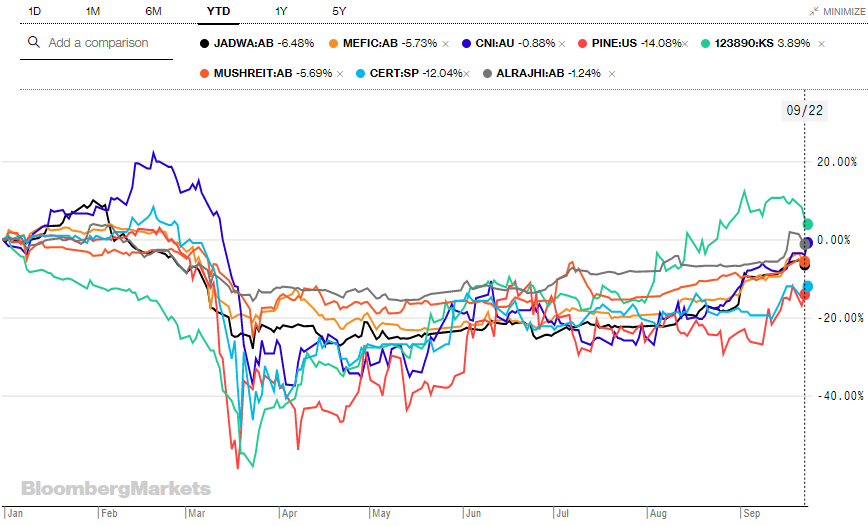

<a id ="sar"></a>

[Return to Table of Contents](#content)

## Saudi Arabian Diversified REITs

In [21]:
sar = data.set_index("BBG Ticker").T[["MUSHREIT AB Equity", "JADWA AB Equity", "MEFIC AB Equity",
                                     "ALRAJHI AB Equity", "MAATHER AB Equity"]].T.sort_values(by="1 Month (%)", ascending=False)
sar.style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Saudi Top Diversified REITs')

,Name,Industry,Country,Market Cap (USD),Dividend Yield,Dividend Currency,1 Month (%),3 Month (%),6 Month (%),YTD (%),1Y (%),Dividend Type,Price/NAV,Price/FFO,Net Debt/EBITDA
BBG Ticker,,,,,,,,,,,,,,,
JADWA AB Equity,JADWA REIT ALHARAMAIN FUND,Diversified REITs,Saudi Arabia,136.55M,5.23%,SAR,14.11%,20.54%,25.20%,-2.02%,3.00%,Regular Cash,0.8,,4.04
MEFIC AB Equity,MEFIC REIT,Diversified REITs,Saudi Arabia,145.74M,6.76%,SAR,12.35%,21.14%,22.14%,-1.36%,1.34%,Regular Cash,,,5.23
ALRAJHI AB Equity,AL RAJHI REIT,Diversified REITs,Saudi Arabia,416.85M,5.86%,SAR,7.21%,18.60%,20.51%,5.40%,15.28%,Regular Cash,0.98,,8.47
MAATHER AB Equity,AL MAATHER REIT FUND,Diversified REITs,Saudi Arabia,133.02M,7.64%,SAR,5.86%,12.02%,4.38%,0.29%,10.48%,Regular Cash,,,-0.41
MUSHREIT AB Equity,MUSHARAKA REIT FUND,Diversified REITs,Saudi Arabia,209.98M,3.91%,SAR,5.66%,16.60%,14.64%,1.96%,17.40%,Regular Cash,,,3.77


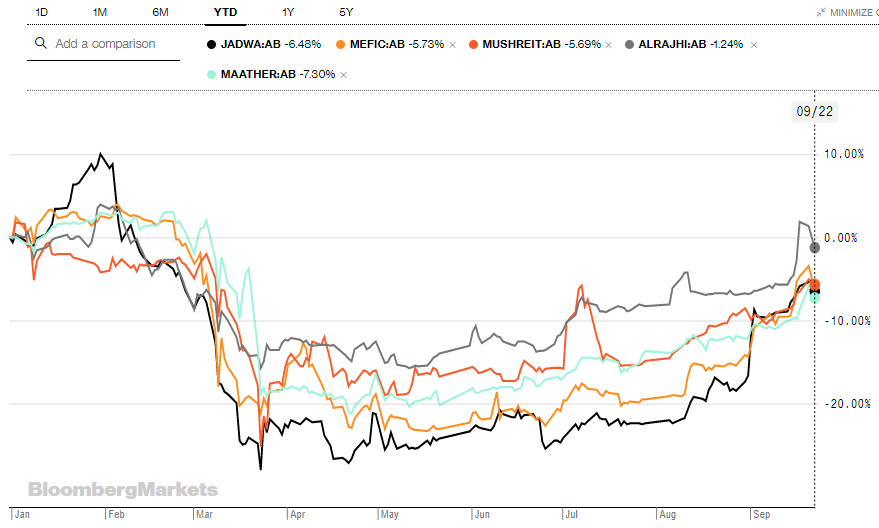

> [MEFIC REIT (MEFIC AB - SAR)](https://www.argaam.com/en/tadawul/tasi/mefic-reit): MEFIC REIT is one of the most diversified listed funds in term of geographic locations as its footprint includes Riyadh, Jeddah and Mecca in Saudi Arabia, in addition to Dubai in the United Arab Emirates. It is also one of the most diversified listed funds in term of sector coverage as its properties operate in residential, retail, office, dining district and hospitality sectors. The fund intends to provide a minimum return of 5% annually. Mefic Capital, the fund manager, would raise the return in case it fall below 5% to a maximum extent of 2% for eight years.  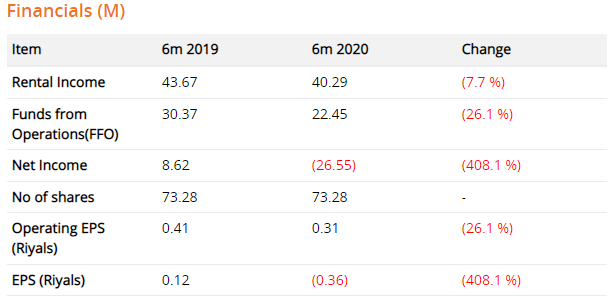

> [Mushraka REIT (MUSHREIT AB - SAR)](https://www.argaam.com/en/tadawul/tasi/musharaka-reit): The fund seeks to generate current income by investing in diversified real estate assets in Eastern and Central regions. It was listed on Saudi Stock Exchange (Tadawul) in August 2017, with investment portfolio comprising nine properties in the commercial, residential and hospitality segments. 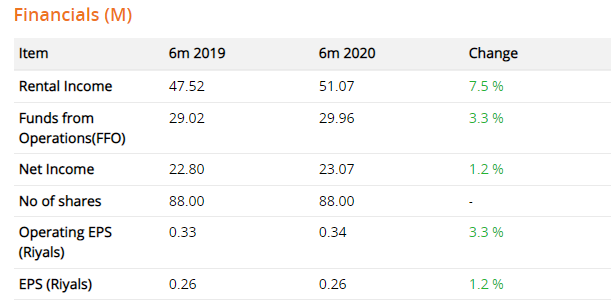

> [Al Rajhi REIT (ALRAJHI AB-SAR)](https://www.argaam.com/en/tadawul/tasi/al-rajhi-reit/): The Shariah-compliant real estate investment trust (REIT) was launched in 2017, with a capital of SAR 1.22 billion. The fund is managed by Al Rajhi Capital Company. The fund seeks to generate regular income by investing in diversified real estate assets, located around Saudi Arabia, except for Mecca and Medina. It was listed on the Saudi Stock Exchange (Tadawul) in March 2018, with investments portfolio comprises 13 properties with a WALE of 7.2 years. The fund saw +50% increase in net income in 1H2020 vs 1H2019.  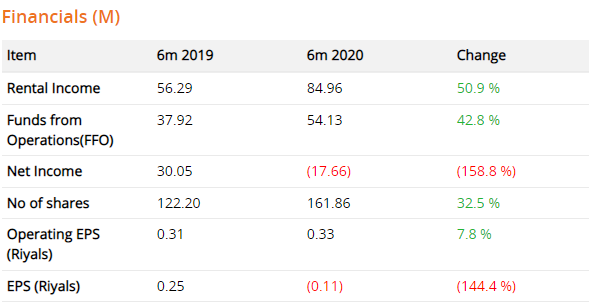 

<a id ="health"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Global Healthcare REITs

In [22]:
hlt = data.set_index("BBG Ticker").T[["3455 JP Equity", "GMRE US Equity", "ARF AU Equity", "PREIT SP Equity"]].T.sort_values(by="1 Month (%)", ascending=False)
hlt.style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Healthcare REITs')

,Name,Industry,Country,Market Cap (USD),Dividend Yield,Dividend Currency,1 Month (%),3 Month (%),6 Month (%),YTD (%),1Y (%),Dividend Type,Price/NAV,Price/FFO,Net Debt/EBITDA
BBG Ticker,,,,,,,,,,,,,,,
PREIT SP Equity,PARKWAYLIFE REAL ESTATE,Health Care REITs,Singapore,1.86B,3.22%,SGD,15.39%,25.30%,56.63%,27.85%,43.44%,Distribution,2.15,,
ARF AU Equity,ARENA REIT,Health Care REITs,Australia,671.65M,5.27%,AUD,11.46%,24.12%,136.65%,2.11%,8.27%,Distribution,1.24,,
3455 JP Equity,HEALTHCARE & MEDICAL INVESTM,Health Care REITs,Japan,363.50M,5.25%,JPY,4.96%,2.04%,43.66%,-1.64%,0.06%,Return of Capital,,14.89,10.26
GMRE US Equity,GLOBAL MEDICAL REIT INC,Health Care REITs,United States,610.06M,5.93%,USD,2.89%,11.25%,44.73%,3.59%,23.58%,Regular Cash,,14.53,6.91


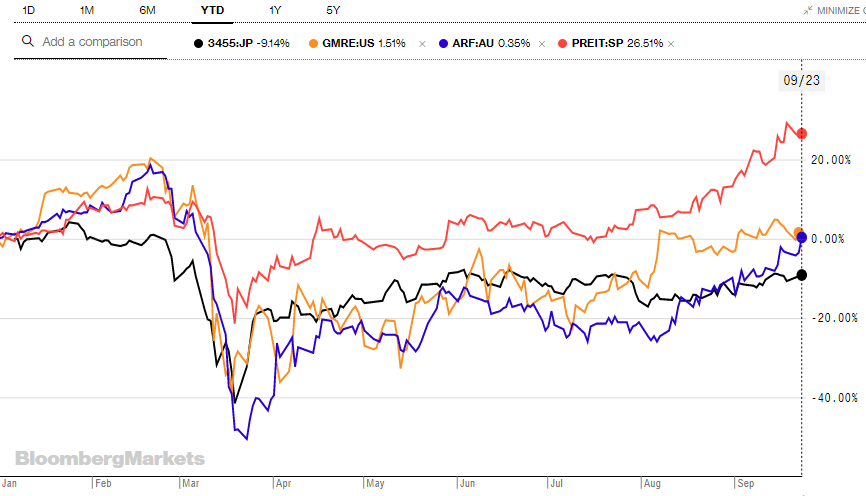

> [**Global Medical US REIT:**](http://investors.globalmedicalreit.com/Cache/IRCache/2653b2fe-578b-5224-869b-bb20b3153d5c.PDF?O=PDF&T=&Y=&D=&FID=2653b2fe-578b-5224-869b-bb20b3153d5c&iid=4677448) The company has an attractive dividend yield to 5.93%. Instead of slowing its purchase pace, Global Medical bought five properties for USD 87 million this year, and revenue has taken off. Through the first six months, reported revenue is USD 43.7 million, up 36.2% year over year. Net income was USD 1.5 million, up 7%, compared to the first six months of 2019. The company's FFO per share was a reported USD 0.19 in the second quarter, compared to USD 0.18 year over year. As of June 30, the company said that 98% of the properties were occupied and in the second quarter, the collection rate was 95%. 100% of their facilities that were open at the beginning of the pandemic remain open. None of their facilities have closed.

> [**Parkway Life REIT (PREIT-SGD)**](http://plifereit.listedcompany.com/newsroom/20200728_070045_C2PU_ZQO6E7Q43IY8VQ1D.1.pdf): In the September 2020 review, PREIT was included in the FTSE EPRA Nareit Global Developed Index, sending its share price above its pre-COVID-19 high of SGD 3.74. PREIT derives c.40% of its earnings from healthcare assets in Japan. The Japan properties have an “up only” rent review provision whereby rental rates either remain constant or increase, but cannot decrease. Parkway Life Real Estate Investment Trust (PREIT) has an average weighted lease expiry of 6.4 years, and its master lease structure in Singapore is tied to 1%+CPI (Consumer Price Index) formula which protects downside risks (In the event of negative CPI, or deflation, CPI will be reset to zero, with a guaranteed 1% growth in minimum rent. This ensures minimum 1% growth for Parkway Life REIT). DPU grew by 2.5% to 3.36 cents (2Q Y-O-Y) and 1.9% to 6.68 cents (1H Y-O-Y). Low all-in cost of debt of 0.60%. 

> [**Arena REIT (ARF-AUD)**](https://www.arena.com.au/arena/media/docs/ASX%20announcements%20-%20other/FY20-Results-Presentation-FINAL_WEB.pdf): Arena REIT is an internally managed Australian Real Estate Investment Trust (A-REIT) listed on the ASX (ASX code: ARF) and included in the S&P/ASX 300 Index. Arena REIT's investment strategy is to invest in sectors such as childcare, healthcare, education and government tenanted facilities leased on a long term basis. Net property income, the key driver of operational performance, was up 10% compared to the same period last year, rising to USD 53.9 million, driven by rental increases of 3.8% in its ELC (Early Learning Centre) portfolio of 211 centres and 2.6% in its healthcare portfolio of 11 properties, as well as contributions from four newly acquired operating properties and the completion of three development sites. In the three months to June 2020, 84% of contracted rent has been received with 14% deferred to be paid at a later date. Around 10% will be received in FY21 with the balance thereafter. The annual average rental increase was 3.4% in FY20 with the ELC portfolio generating a 3.9% increase. This is slightly higher than the 3.8% recorded last year. The weighted average lease expiry (WALE) of the lease book of ELC’s was 14.2 years, slightly higher than the 14.1 years reported last year. Gearing levels (ratio of a REIT's debt to its total deposited property value) are now down to 14.8%, compared to 22.1% at the same point last year. 



> [**HEALTHCARE & MEDICAL INVESTM (3455-JPY)**](http://www.hcm3455.co.jp/ja/portfolio/index.html): Healthcare & Medical Investment Corp is a Japan-based investment company. The Company aims to achieve stable earnings from mid- to long-term perspectives through investment in real estate and other related assets. The Company primarily invests in facilities and buildings for the elderly, as well as medical related facilities. It has 36 properties with an average NOI (net operating income) Yield of 5.6% and a WALE (Weighted Avg Lease Expiry) of 13.8 years. The Occupany rate has stayed at 100% through out the pandemic for each month till August 2020.

<a id ="industrial"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Industrial REITs

In [32]:
ids = data.set_index("BBG Ticker").T[["SBREIT SP Equity", "ADI AU Equity", "FLT SP Equity", "IIPR US Equity","ALLT SP Equity"]].T.sort_values(by="1 Month (%)", ascending=False)
ids.style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Industrial REITs')

,Name,Industry,Country,Market Cap (USD),Dividend Yield,Dividend Currency,1 Month (%),3 Month (%),6 Month (%),YTD (%),1Y (%),Dividend Type,Price/NAV,Price/FFO,Net Debt/EBITDA
BBG Ticker,,,,,,,,,,,,,,,
SBREIT SP Equity,SOILBUILD BUSINESS SPACE REI,Industrial REITs,Singapore,452.23M,6.02%,SGD,23.16%,27.08%,128.94%,-0.38%,2.81%,Distribution,0.84,,
ADI AU Equity,APN INDUSTRIA REIT,Industrial REITs,Australia,384.74M,6.49%,AUD,9.16%,6.50%,69.43%,-2.77%,1.92%,Regular Cash,0.94,,
FLT SP Equity,FRASERS LOGISTICS & COMMERCI,Industrial REITs,Singapore,3.48B,4.87%,SGD,3.68%,25.06%,121.51%,17.43%,25.25%,Special Cash,1.57,,
IIPR US Equity,INNOVATIVE INDUSTRIAL PROPER,Industrial REITs,United States,2.67B,3.77%,USD,2.00%,30.38%,111.21%,66.42%,35.51%,Regular Cash,,22,1.41
ALLT SP Equity,ARA LOGOS LOGISTICS TRUST,Industrial REITs,Singapore,503.59M,8.42%,SGD,-0.03%,15.19%,76.71%,-7.84%,-7.16%,Distribution,1.09,,7.65


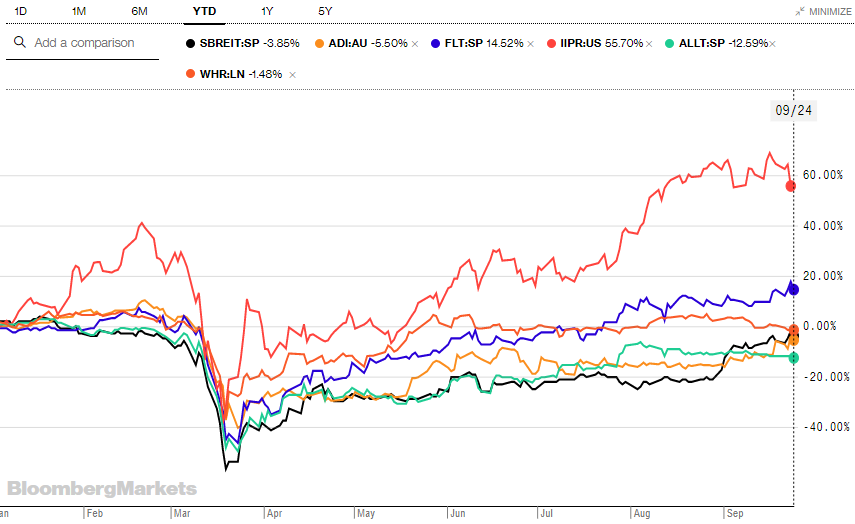

> [Soilbuild Business REIT (SBREIT SP-Singapore)](https://soilbuildreit.listedcompany.com/newsroom/20200824_173408_SV3U_TN18X1S94YVHHV82.1.pdf): The company has 10 properties in Singapore (2 business parks, 8 industrial properties) and 3 properties in Australia (2 office assets, 1 industrial asset). Year-on-year (“y-o-y”) gross revenue rose by 2.9% to SGD 23.0 million while net property income (“NPI”) declined by 11.8% to SGD 16.2 million largely due to the provision of SGD 1.5m rent waivers to eligible SME tenants. Portfolio occupancy at 89.5% and WALE (by GRI) of 3.4 years as at 30 June 2020. Weighted average all-in cost of debt of 3.14% p.a. as at 30 June 2020. Weighted average debt maturity of 1.9 years. Fixed interest rate for 80.4% of borrowings. Aggregate leverage of 36.9% as at 30 June 2020. 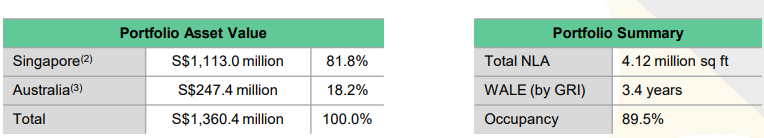

> [APN Industrial REIT (ADI AU-Australia)](https://apngroup.com.au/fund/apn-industria-reit/report-and-news/asx-announcements/): Portfolio of 32 assets – 56% of which are industrial warehouses and 44% business park properties (by value). Occupancy as at 30 June 2020 was 94%; post balance date, leasing transactions have been agreed that will increase occupancy to 96%. Funds From Operations (FFO), the Board’s preferred measure of performance, increased 17.8% YoY. 28.8% gearing, below the target band of 30-40%. Portfolio generates resilient income from a tenant base underpinned by government, listed, national and multinational companies, which make up 95% of the rent roll. Weighted average debt maturity 2.9 years. Weighted average interest rate 2.9% and 6.9x interest cover. Industrial warehouse portfolio (excluding Westrac) 94% leased with 4.7 year WALE, average cap rate of 6.5%. 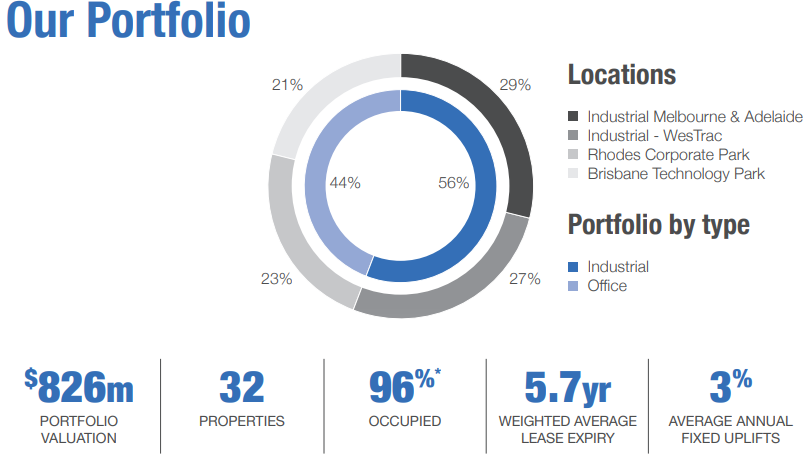

> [Frasers Logistics & Commercial Trust](https://flct.frasersproperty.com/newsroom/20200831_230437_BUOU_6BR94L0BJM3YAYGB.1.pdf): FLCT has a portfolio comprising 99 logistics and commercial properties worth approximately SGD 6.0 billion, diversified across five major developed markets – Australia, Germany, Singapore, United Kingdom and the Netherlands. **In 3QFY20 Net Distributable Income has jumped +83.5% compared to 3Q19**. Cost of borrowing was 2.1% with an Interest Coverage Ratio of 6.7 times. 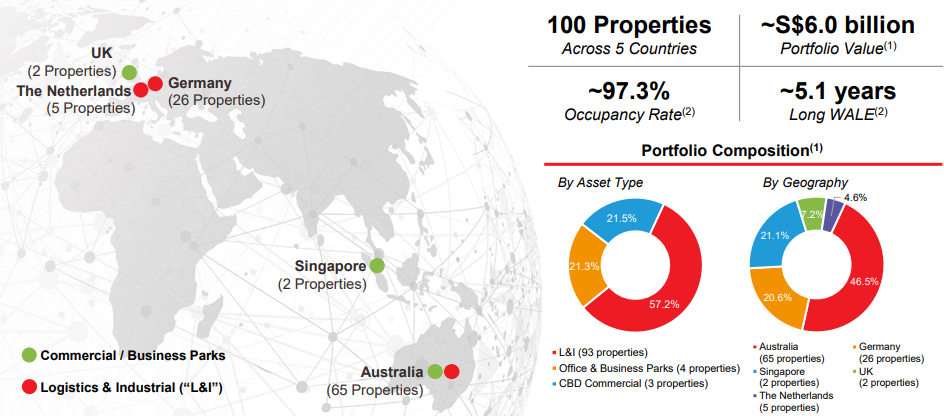

> 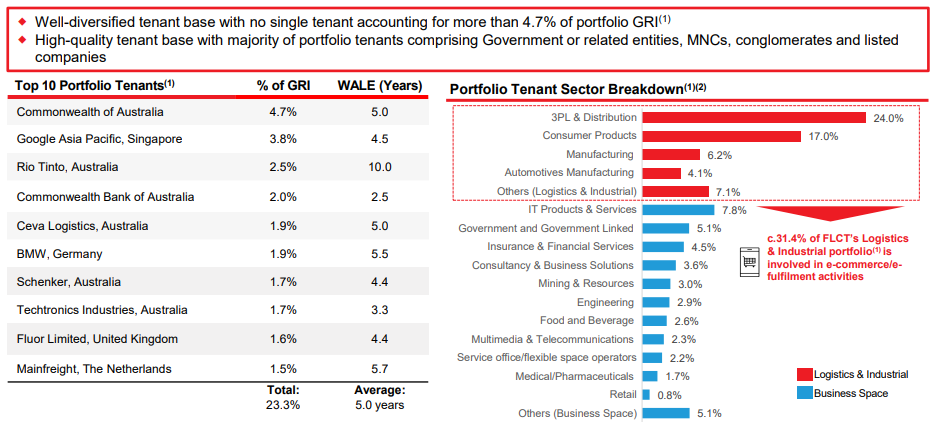

> [ARA LOGOS Logistics Trust (ALLT SP - Singapore)](https://investor.aralogos-reit.com/newsroom/20200909_074421_K2LU_S7LJQ4SFOO6FHY6A.1.pdf): ARA LOGOS Logistics Trust, “ALOG”, is a leading Asian logistics REIT with a SGD 1.26 billion portfolio and 27 Properties across Singapore and Australia. Very **attractive dividend yield of 8.42%**. **Strong Portfolio Occupancy at 97.0%**. Higher Gross Revenue and NPI of 4.3% and 7.0% respectively, mainly due to commencement of new leases at several properties. 2Q FY20 distributable income increased 1.3% to SGD 14.5 mil from SGD 14.3 mil in 2Q FY19. On a like-for-like basis, 2Q FY20 was up 25.0% from 2Q FY19. Weighted Average Debt Maturity was 3.5 years as at 30 Jun 2020. 89.4% of distributable income is hedged or derived in SGD to reduce the impact of adverse exchange rate fluctuation. 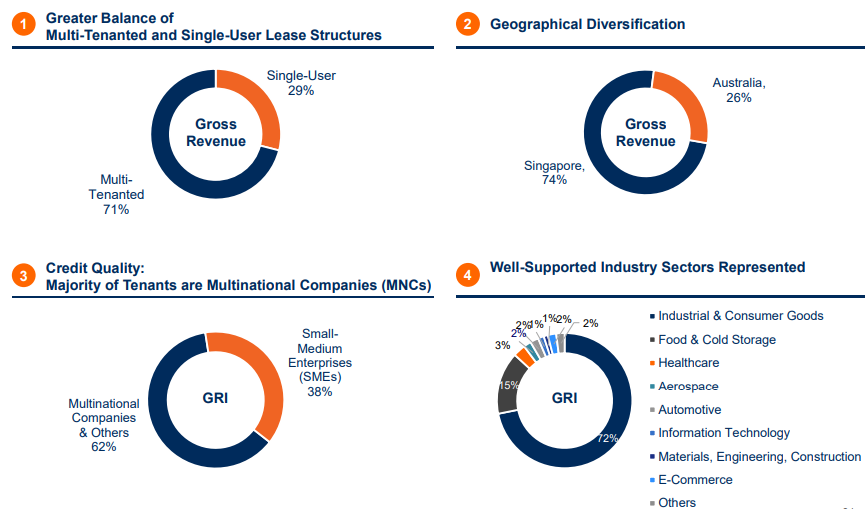


> [Innovative Industrial Properties (IIPR US - United States)](http://investors.innovativeindustrialproperties.com/~/media/Files/I/IIP-IR/documents/events/investor-presentation-8-12-20.pdf): Innovative Industrial Properties is the pioneering real estate investment trust for the **medical-use cannabis industry**. They target specialized industrial real estate assets for the regulated medical-use cannabis industry for acquisition, including sale-leaseback transactions with quality tenants that are licensed operators under long-term, triple net leases. **The REIT has 61 properties across 16 states. 99.2% properties are leased with a Weighted Average Lease Length (WALL) of 16.1 Yrs. The Debt to total gross assets is just 12%. It has a yield of 3.77% USD and has been the top performer across the board among all REITs with a YTD return of 66%!.** 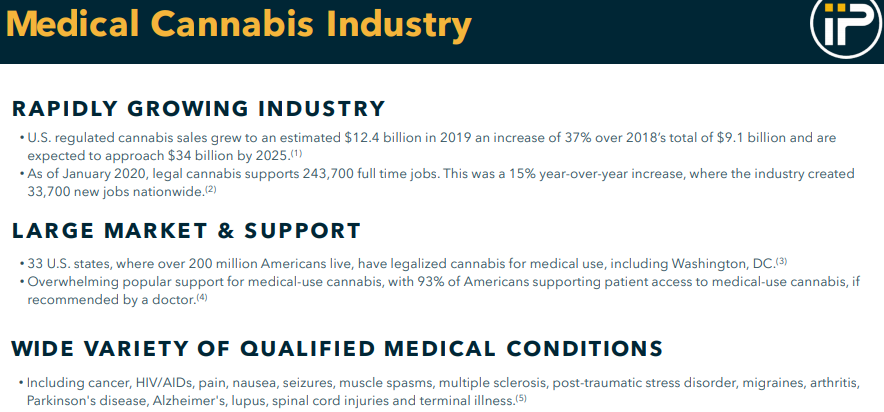 

<a id ="specialty"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Specialized REITs

In [35]:
spl = data.set_index("BBG Ticker").T[["KDCREIT SP Equity", "CQE AU Equity", "APR-U CN Equity", "NSA US Equity", "GLPI US Equity"]].T.sort_values(by="1 Month (%)", ascending=False)
spl.style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Specialized REITs')

,Name,Industry,Country,Market Cap (USD),Dividend Yield,Dividend Currency,1 Month (%),3 Month (%),6 Month (%),YTD (%),1Y (%),Dividend Type,Price/NAV,Price/FFO,Net Debt/EBITDA
BBG Ticker,,,,,,,,,,,,,,,
KDCREIT SP Equity,KEPPEL DC REIT,Specialized REITs,Singapore,3.55B,2.47%,SGD,3.49%,25.62%,72.24%,47.72%,53.08%,Distribution,2.6,,5.12
CQE AU Equity,CHARTER HALL SOCIAL INFRASTR,Specialized REITs,Australia,714.92M,5.42%,AUD,3.16%,14.48%,89.43%,-8.67%,-12.81%,Regular Cash,0.95,,
APR-U CN Equity,AUTOMOTIVE PROPERTIES REAL E,Specialized REITs,Canada,353.53M,8.06%,CAD,1.81%,14.30%,73.08%,-16.07%,-2.05%,Regular Cash,,5.53,6.79
NSA US Equity,NATIONAL STORAGE AFFILIATES,Specialized REITs,United States,3.35B,3.98%,USD,1.21%,21.33%,44.60%,4.27%,7.02%,Regular Cash,,18.14,7.03
GLPI US Equity,GAMING AND LEISURE PROPERTIE,Specialized REITs,United States,7.86B,6.51%,USD,-2.38%,-3.48%,96.03%,-11.50%,-0.11%,Regular Cash,,11.81,5.28


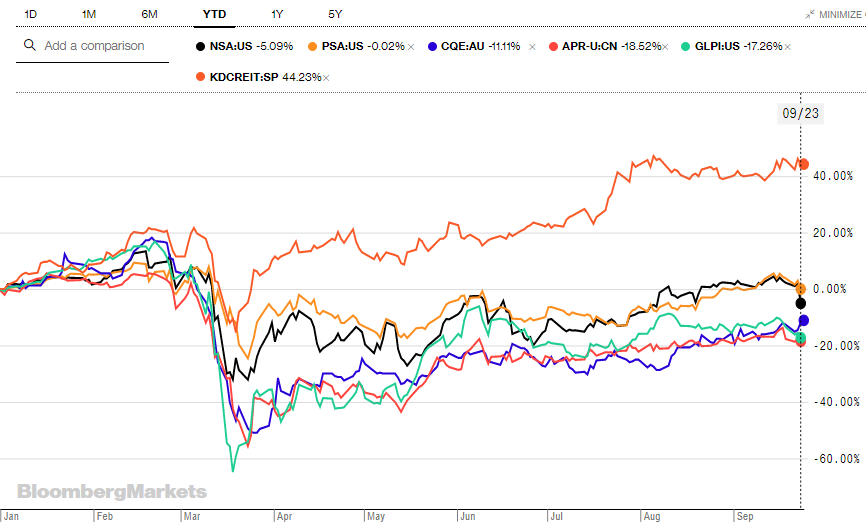

> [**Gaming and Leisure Properties (GLPI - US)**](https://glpropinc.gcs-web.com/static-files/782f734a-b7b3-4d78-91e5-8a5bfb3caf66): Gaming and Leisure Properties, Inc. (“GLP”) is a self-administered and self-managed Pennsylvania real estate investment trust engaged in acquiring, financing, and owning real property to be leased to gaming operators in "triple net" lease arrangements. **GLP’s portfolio consists of 44 gaming and related facilities, which are geographically diversified across 16 states**. GLP intends to grow its portfolio by aggressively pursuing opportunities to acquire additional gaming facilities to lease to gaming operators. GLP also intends to diversify its portfolio over time by acquiring properties outside the gaming industry. **The REIT boasts a very attractive dividend yield of 6.51%. Strong Collections: Contractual rent due collection of 98.6% in July and 100% in both August and September.** 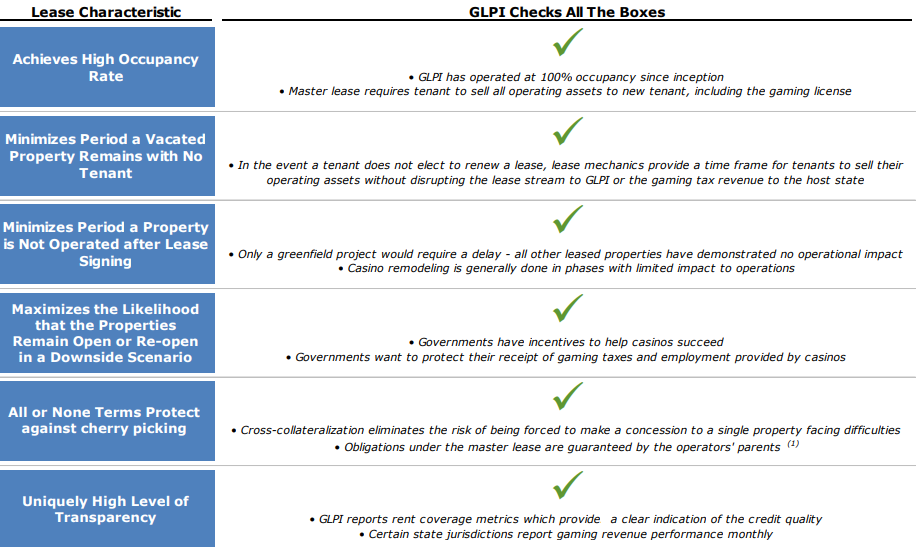

> [**National Storage Affiliates (NSA - US)**](https://content.equisolve.net/_eb4dd54ab1aa6f47d875d6c2e7810bac/nationalstorageaffiliates/db/184/1439/pdf/2020+09_September+Company+Update_FINAL+%281%29.pdf): National Storage Affiliates is a self-administered, self-managed real estate investment trust, dedicated to the ownership, operation and acquisition of high quality regional self storage facilities located within high growth markets. NSA currently holds ownership interests in and operates **784 self storage properties located in 35 states + Puerto Rico with approximately 49 million rentable square feet**. NSA is one of the largest owners and operators of self storage facilities among public and private companies in the U.S. **Cash collections in July and August** were similar to the second quarter (~**99% of normal collection levels**). Rent increases to existing customers have resumed across a majority of the portfolio. 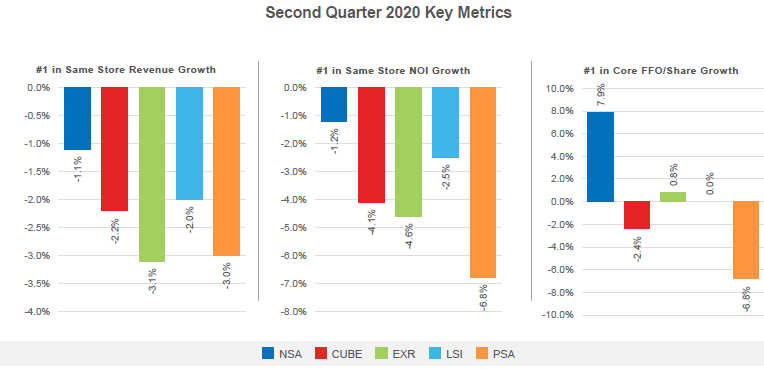


> [**Charter Hall Social Infrastructure REIT (CQE AU-Australia)**](https://auth-corporate.charterhallweb.com/docs/librariesprovider2/media-releases/11-8-20---cqe-fy20-results-presentation.pdf?sfvrsn=305747b6_2): The Trust is focused on investing in social infrastructure properties. It invests in properties within Australia and New Zealand. Its portfolio includes approximately 421 properties, which are located across various locations, including Queensland, South Australia, Western Australia, New South Wales/ Australian Capital Territory, Tasmania and Northern Territory.  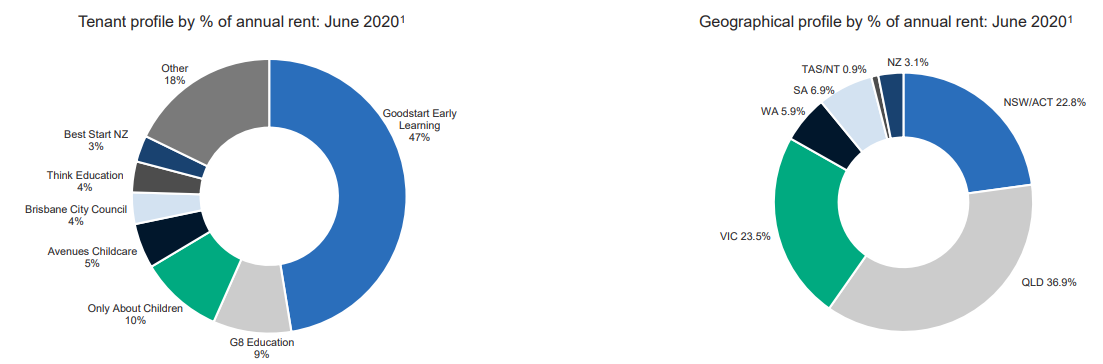

> 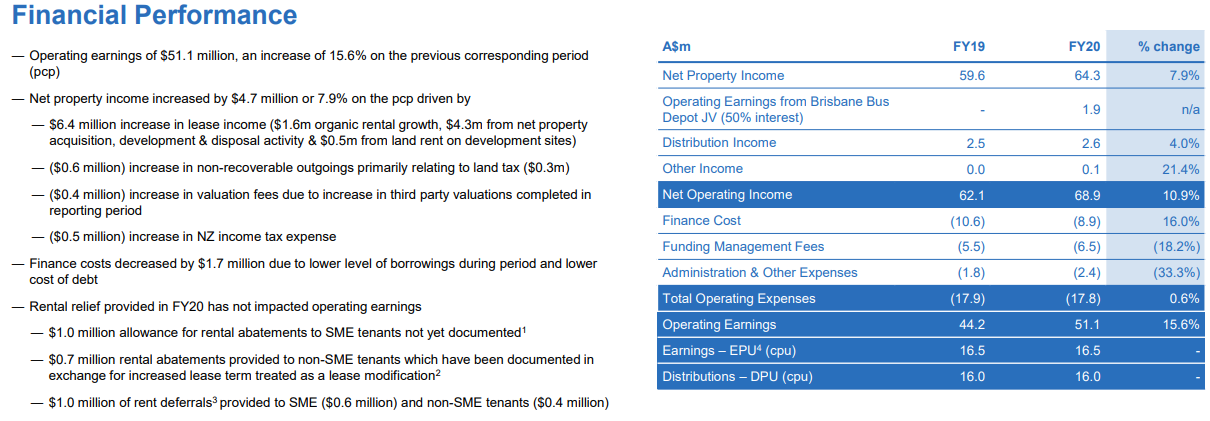

> [**Automotive Properties REIT (APR-U Canada)**](https://automotivepropertiesreit.ca/wp-content/uploads/2020/09/APR_Investor_Presentation_Aug_2020.pdf): Automotive Properties REIT is an open-ended, growth-oriented real estate investment trust that owns income-producing automotive dealership properties in strategic Canadian urban centres. The REIT’s portfolio currently consists of 64 income-producing properties, located on approximately 200 acres throughout metropolitan markets across British Columbia, Alberta, Saskatchewan, Manitoba, Ontario and Québec. The properties encompass approximately 2.4 million square feet of gross leasable area, and are occupied by retail automotive dealerships, service centres and ancillary businesses. 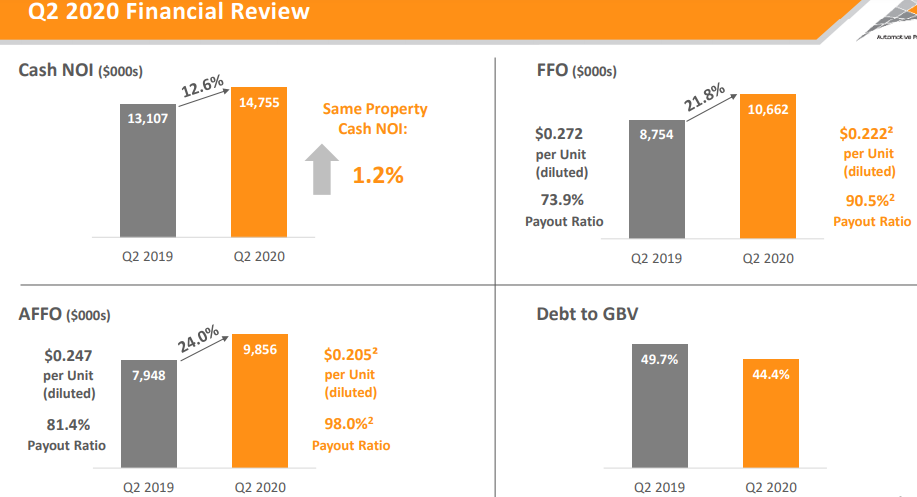

> 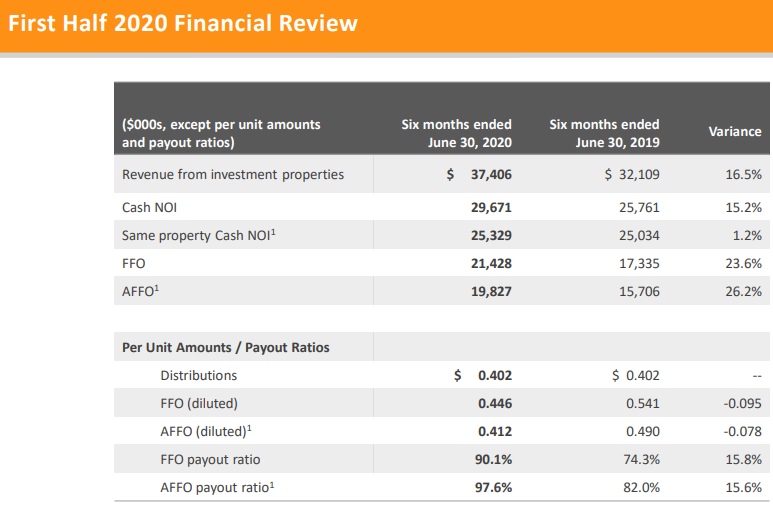

> REITs/REOCs within TD Securities coverage universe currently trade at an 8.2% spread to the GoC 10-year bond yield,
up 300 basis points from the 5.2% spread at the beginning of 2020, and the long-term average 4.9% spread. 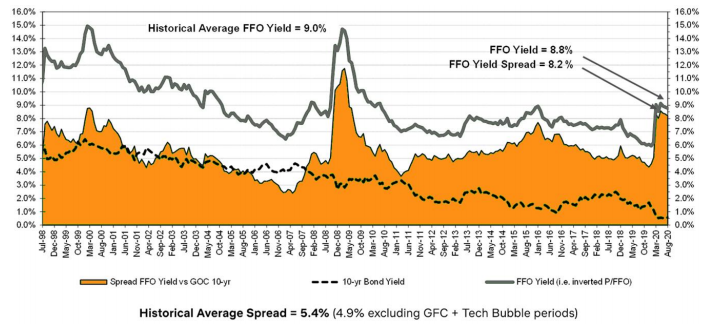

> [**KEPPEL DC REIT (KDCREIT:SP - Singapore)**](https://www.keppeldcreit.com/en/download.ashx?id=16935): Keppel DC REIT is the first pure-play **data centre REIT** listed in Asia on the Singapore Exchange. Its current portfolio comprises **18 high-quality data centres** strategically located in key data centre hubs. With an aggregate lettable area of approximately 1,952,280 sq ft, the **portfolio spans 11 cities in eight countries in Asia Pacific and Europe**. 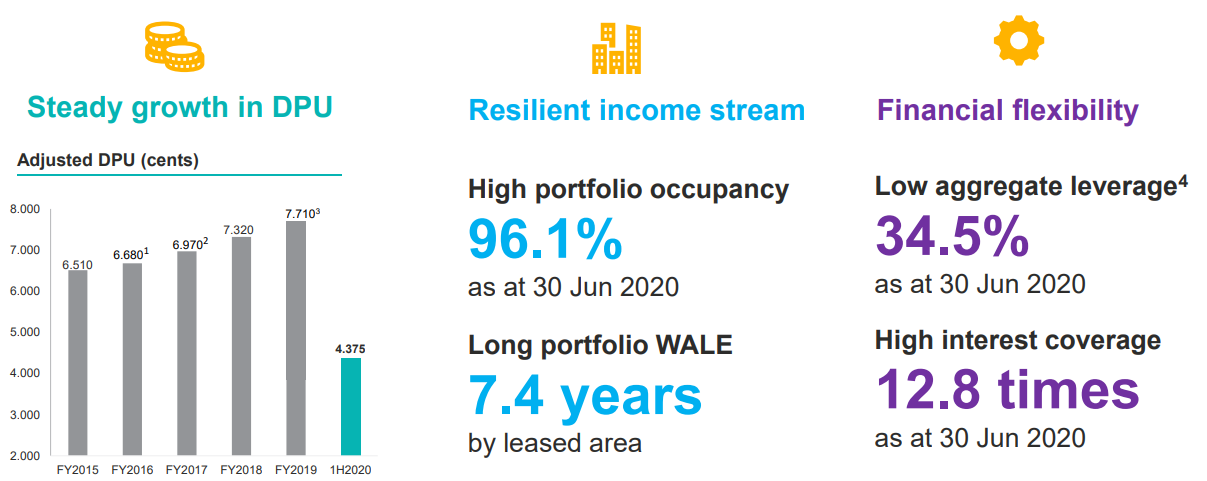

> 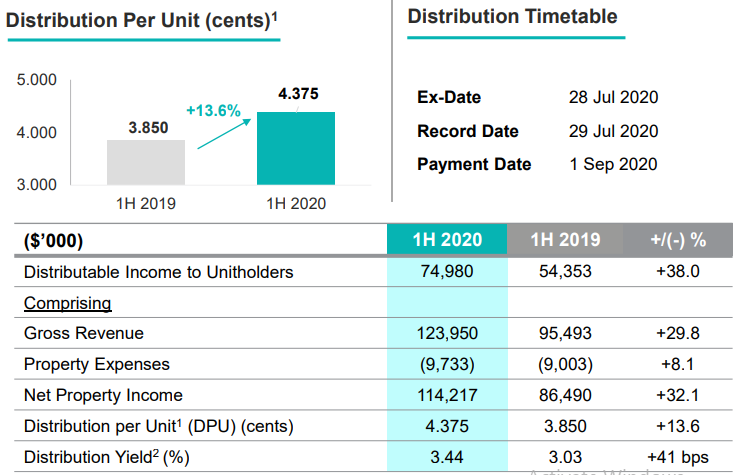

> 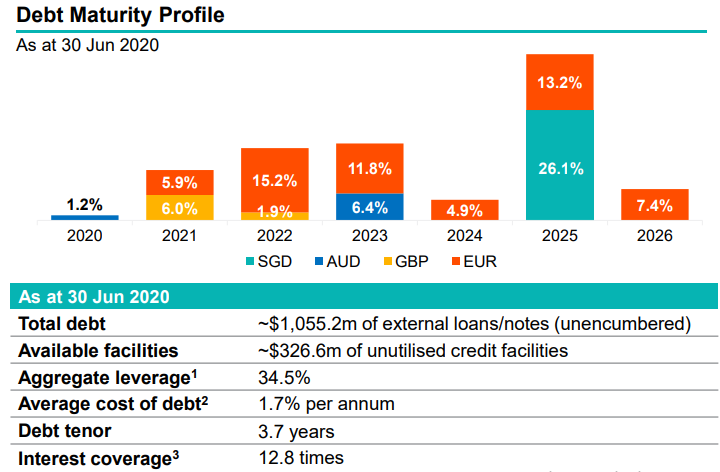

> 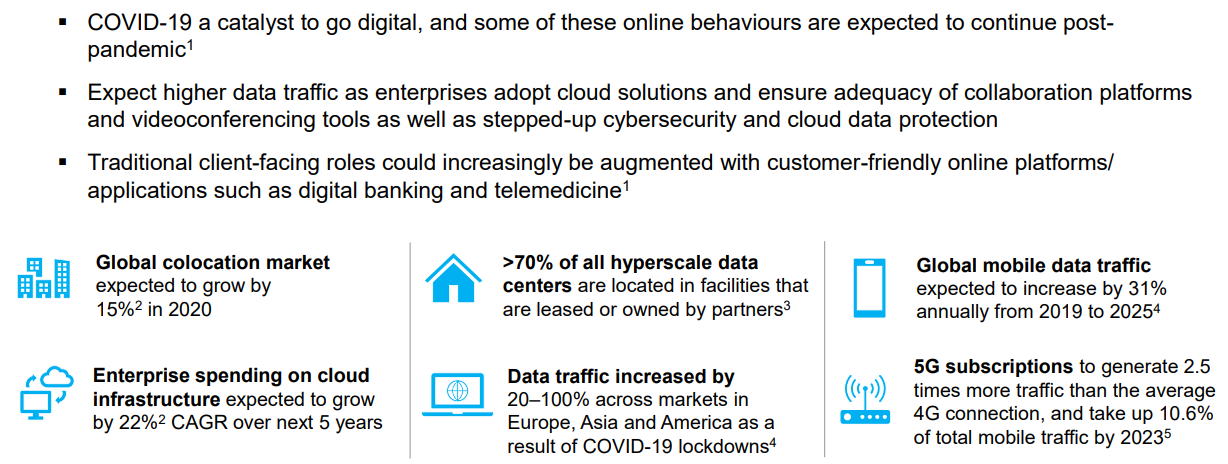

[Return to Table of Contents](#content)